In [1]:
#common imports
import numpy as np 
import pandas as pd 
import PIL
import matplotlib.pyplot as plt
import seaborn as sns
import keras 
import math

from urllib.parse import urlparse

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization ,Activation
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint


In [3]:
# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
import os
# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

print("\n### Libraries Imported ###\n")
### Libraries Imported ###


### Libraries Imported ###



In [5]:
# Load Url Data 
urls_data = pd.read_csv("urldata.csv")
urls_data.head()

,url,label,result,url_length,hostname_length,path_length,fd_length,count-,count@,count?,...,count.,count=,count-http,count-https,count-www,count-digits,count-letters,count_dir,use_of_ip,short_url
0,https://www.google.com,benign,0,22,14,0,0,0,0,0,...,2,0,1,1,1,0,17,0,1,1
1,https://www.youtube.com,benign,0,23,15,0,0,0,0,0,...,2,0,1,1,1,0,18,0,1,1
2,https://www.facebook.com,benign,0,24,16,0,0,0,0,0,...,2,0,1,1,1,0,19,0,1,1
3,http://www.tradefairnotes.com/Login/,malicious,1,32,18,7,5,0,0,0,...,1,0,1,0,0,0,26,2,1,1
4,http://surereturnx.com/irs-new/irs.php,malicious,1,38,15,16,7,1,0,0,...,2,0,1,0,0,0,30,2,1,-1


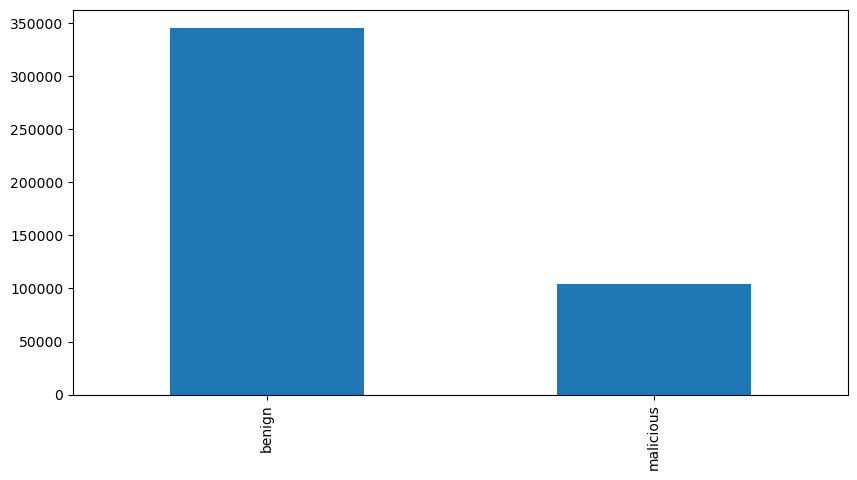

In [6]:
events = urls_data[['label']].replace(' ', 'None')
events.label.value_counts().plot(kind='bar', figsize=(10,5))
def makeTokens(f):
    # make tokens after splitting by slash
    tkns_BySlash = str(f.encode('utf-8')).split('/')    
    total_Tokens = []
    for i in tkns_BySlash:
        # make tokens after splitting by dash
        tokens = str(i).split('-')     
        tkns_ByDot = []
        for j in range(0,len(tokens)):
             # make tokens after splitting by dot
            temp_Tokens = str(tokens[j]).split('.')    
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    #remove redundant token
    
    total_Tokens = list(set(total_Tokens))    
    if 'com' in total_Tokens:
        #removing .com because it occurs a lot of times 
        total_Tokens.remove('com')   
    return total_Tokens

In [7]:
# Labels
y = urls_data["label"]

In [8]:
# Features
url_list = urls_data["url"]

In [9]:
# Using Custom Tokenizer
vectorizer = CountVectorizer(tokenizer=makeTokens)

In [10]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

C:\Users\perni\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#using logistic regression
logit = LogisticRegression()
logit.fit(X_train, y_train)
import tkinter as tk
root = tk.Tk()
canvas1 = tk.Canvas(root,width = 800, height = 600)
canvas1.pack()

label1 = tk.Label(root, text='Malicious URL Detection')
label1.config(font=('helvetica', 24))
canvas1.create_window(400, 50, window=label1)

label2 = tk.Label(root, text='Paste Here:')
label2.config(font=('helvetica', 20))
canvas1.create_window(400, 200, window=label2)

entry1 = tk.Entry(root) 
canvas1.create_window(400, 280, window=entry1)

def getSquareRoot():
    x1 = entry1.get()

    # Parse the URL to check for 'http' or 'https' and 'www'
    parsed_url = urlparse(x1)
    if not parsed_url.netloc.startswith('www'):
        # Add 'www' to the URL if it's missing
        x1 = parsed_url.scheme + '://www.' + parsed_url.netloc + parsed_url.path

    label3 = tk.Label(root, text='Result:', font=('helvetica', 20))
    canvas1.create_window(400, 420, window=label3)
    
    res = vectorizer.transform([x1])
    prediction = logit.predict(res)
    
    if prediction == 'benign':
        result = 'Safe'
    else:
        result = 'Malicious'
    
    label4 = tk.Label(root, text=result, font=('helvetica', 20))
    canvas1.create_window(400, 480, window=label4)

button1 = tk.Button(text='Check', command=getSquareRoot, bg='brown', fg='white', font=('helvetica', 20, 'bold'))
canvas1.create_window(400, 350, window=button1)

root.mainloop()

C:\Users\perni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
